In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import dataframe_image as dfi
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
%ls

drive/  sample_data/


# Data Load

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%ls 'drive/MyDrive/CE'

 cf.csv                      'Indy Mailed 6.10.2020.xlsx'
 cntrl.csv                    invycampv1.csv
 df1_app_data.csv             invycntrlv1.csv
 indy_as400.csv              'Simpli.fi Indy Campaign June 1 to July 31.xlsx'
 indy_as400_v1.csv           'Tables & Rows.gsheet'
'Indy Mailed 6.10.2020.xls'


In [6]:
l1= '/content/drive/MyDrive/CE/invycampv1.csv'
l2= '/content/drive/MyDrive/CE/invycntrlv1.csv'

In [7]:
df_col= ['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id','payment_type', 'usr_id', 'amount', 'txn_num_daily']

In [8]:
df1 = pd.read_csv(l1, header=None, names= df_col)
df1['flag']= 'campaign'
df2 = pd.read_csv(l2, header=None, names= df_col)
df2['flag']= 'control'

In [9]:
camp= '/content/drive/MyDrive/CE/indy_as400_v1.csv'
cntrl= '/content/drive/MyDrive/CE/cntrl.csv'
#%cp df1_app_data.csv '/content/drive/MyDrive/'

In [10]:
df_col= ['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id','property_class','payment_type', 'usr_id', 'amount', 'txn_num_daily']

In [11]:
cf= pd.read_csv(cntrl, names= df_col)

In [12]:
classa= cf.loc[cf.property_class== 'Class A', 'as400id'].unique().tolist()

In [13]:
df2.shape

(2477196, 10)

In [14]:
df= pd.concat([df1,df2], axis=0)

In [15]:
df.shape

(5337516, 10)

In [16]:
df=df.loc[~df.as400id.isin(classa)]

In [17]:
df.head()

,datetime,machine_id,machine_type,room_id,as400id,payment_type,usr_id,amount,txn_num_daily,flag
0,2019-06-11,NaN,NaN,DI-19268-1,19268,CreditCard-SR,379645*****1003,1.75,1,campaign
1,2019-06-13,NaN,NaN,DI-18628-1,18628,CreditCard-SR,464018******3153,1.50,1,campaign
2,2019-06-13,NaN,NaN,DI-19268-1,19268,CreditCard-SR,423223******3110,3.50,2,campaign
3,2019-06-13,NaN,NaN,DI-19268-1,19268,CreditCard-SR,426684******8363,2.00,1,campaign
4,2019-06-13,NaN,NaN,DI-19268-1,19268,CreditCard-SR,443041******0898,9.75,5,campaign


In [18]:
df['datetime']= pd.to_datetime(df.datetime)

In [19]:
df['YearMonth'] = pd.to_datetime(df['datetime']).dt.strftime('%Y-%m')

In [20]:
df.YearMonth.value_counts()

2021-03    354417
2021-04    347052
2020-10    344251
2021-01    333073
2020-11    329303
2020-09    328159
2020-08    321666
2020-12    314064
2021-02    292171
2020-07    273740
2020-06    238632
2020-05    235378
2020-03    218092
2020-04    205412
2020-02    191249
2020-01    176876
2019-12    163979
2019-11    152497
2021-05    127098
2019-10    117504
2019-09     72073
2019-08     32947
2019-07     15445
2019-06      8490
2019-05      6833
2019-04      5168
2019-03      4376
2019-02      1980
2019-01       655
2018-12       131
2018-11        84
2018-10        24
2018-08         1
Name: YearMonth, dtype: int64

In [21]:
df.payment_type.unique()
df['broad_pay_type']= df.payment_type.map({'App': 'App', 'CreditCard-SR': 'Card', 'LaundryCard': 'Card'}).fillna('Other')

In [22]:
df.memory_usage().sum()

542133280

## Campaign Definition

In [23]:
indym= pd.read_excel('/content/drive/MyDrive/CE/Indy Mailed 6.10.2020.xls')
indym['as400id']= indym.AS400.astype('str').unique()
print(indym.AS400.astype('str').tolist())
indym['FirstMail']='Y'

['5108462', '5108247', '5100103', '5100062', '5109028', '5109035', '5108597', '19107', '5108587', '5108470', '5108010', '18010', '5108725', '19983', '5119000', '19166', '5108991', '18013', '18015', '5109865', '18324', '19638', '5109873', '19359', '5108828', '5108018', '19833', '18020', '19623', '5108234', '5109328', '5120051', '5109381', '5108662', '5108528', '19015', '19264', '5108185', '18742', '19161', '5108908', '19076', '5109830', '19256', '19121', '18029', '5107618', '19148', '5109888', '5109851', '5109838', '5109329', '19143', '5108480', '5107612', '5108479', '19197', '5109807', '5109004', '5108473', '19826', '18035', '18445', '5107652', '19268', '18037', '19827', '19964', '5109023', '5108936', '18039', '5109025', '5109849', '5108918', '19708', '5107627', '5108957', '5108487', '5109869', '18937', '5109845', '5107611', '18041', '18048', '5109857', '18045', '5100041', '5107629', '5108493', '5109475', '5109825', '18049', '19975', '5109829', '18051', '5108827', '18070', '5110725', '

In [24]:
indyr= pd.read_excel('/content/drive/MyDrive/CE/Simpli.fi Indy Campaign June 1 to July 31.xlsx')

In [25]:
indyr['as400id']= indyr.loc[:, 'Geography Geo Fence Name'].apply(lambda x: x[x.rfind('-'):]).str.replace('-','').str.strip().astype(str)

In [26]:
len(indym.AS400.unique())

566

In [27]:
campaign= indym.merge(indyr, on='as400id', how='left')

In [28]:
campaign.dtypes

Apartment Name               object
Street                       object
City                         object
State                        object
ZIP                           int64
Latitude                    float64
Longitude                   float64
AS400                         int64
Number of Units Mailed 1      int64
SecondMail                   object
as400id                      object
FirstMail                    object
Geography Geo Fence Name     object
Performance Impressions     float64
Performance Clicks          float64
Performance CTR             float64
Performance eCPM            float64
Performance Total Spend     float64
dtype: object

## Gross Counts

In [29]:
campaign['Geography Geo Fence Name'].value_counts()

NORTHSHORE APARTMENTS -5109340          1
SEDDLEMEYER APARTMENTS -5108204         1
SPEEDWAY APARTMENTS -5108767            1
BREMEN VILLAGE APARTMENTS -5108185      1
OAKVIEW APARTMENTS -5109916             1
                                       ..
BELLEVILLE PARK APARTMENTS -5108234     1
CANTERBURY HOUSE APARTMENTS -19914      1
SEDGEWICK HOUSE APARTMENTS -5109002     1
OAKS IX APARTMENTS -5109852             1
OPPORTUNITIES PARK APARTMENTS -18628    1
Name: Geography Geo Fence Name, Length: 580, dtype: int64

In [30]:
campaign['GeoFenceFlag']= campaign['Geography Geo Fence Name'].fillna('N').map({'N':'N'}).fillna('Y')

In [31]:
pd.crosstab(campaign.GeoFenceFlag, campaign.SecondMail)

SecondMail,N,Y
GeoFenceFlag,,
N,2,5
Y,455,125


In [32]:
campaign['fflag']= None

In [33]:
campaign.loc[(campaign.GeoFenceFlag=='N') & (campaign.SecondMail=='N'), 'fflag']= 'Neither'
campaign.loc[(campaign.GeoFenceFlag=='Y') & (campaign.SecondMail=='N'), 'fflag']= 'Only GeoFence'
campaign.loc[(campaign.GeoFenceFlag=='N') & (campaign.SecondMail=='Y'), 'fflag']= 'Only 2nd Mail'
campaign.loc[(campaign.GeoFenceFlag=='Y') & (campaign.SecondMail=='Y'), 'fflag']= 'GF2M'
campaign.loc[(campaign.GeoFenceFlag=='Y') & (campaign.FirstMail=='Y'), 'fflag']= 'GF1M'

In [34]:
campaign['fflag'].value_counts(dropna= False)

GF1M             580
Only 2nd Mail      5
Neither            2
Name: fflag, dtype: int64

In [35]:
campaign['ClicksOnly']= campaign['Performance Clicks']

In [36]:
campaign['ImpressionOnly']= campaign['Performance Impressions']- campaign['Performance Clicks']

In [37]:
campaign.columns

Index(['Apartment Name', 'Street', 'City', 'State', 'ZIP', 'Latitude',
       'Longitude', 'AS400', 'Number of Units Mailed 1', 'SecondMail',
       'as400id', 'FirstMail', 'Geography Geo Fence Name',
       'Performance Impressions', 'Performance Clicks', 'Performance CTR',
       'Performance eCPM', 'Performance Total Spend', 'GeoFenceFlag', 'fflag',
       'ClicksOnly', 'ImpressionOnly'],
      dtype='object')

In [38]:
critical= ['as400id', 'Number of Units Mailed 1', 'SecondMail', 'FirstMail', 'GeoFenceFlag', 'fflag', 'ClicksOnly', 'ImpressionOnly']

In [39]:
cf1=campaign.loc[:, critical]

In [40]:
cf1.fflag.value_counts()

GF1M             580
Only 2nd Mail      5
Neither            2
Name: fflag, dtype: int64

## Txn Time Period

In [41]:
df1= df.loc[(df.payment_type=='App')]

In [42]:
campaign_month_map= {'before': ['1900-04-10', '2020-03-31'],
           'pre campaign': ['2020-04-01', '2020-05-31'],
           'campaign': ['2020-06-01', '2020-07-31'],
           '2nd mailer': ['2020-08-01', '2020-09-30'],
           'post campaign': ['2020-10-01', '2020-11-30'],
           'after': ['2020-12-01', '2021-08-09']}

In [43]:
def assign_periods(new_col,periods,date_field,df=df):
  df[new_col]= None
  for k,v in periods.items():
    df.loc[df[date_field].between(v[0], v[1]), new_col]= k
  return(df)

In [44]:
df1= assign_periods('campaign_month', campaign_month_map, 'datetime', df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [45]:
df1.campaign_month.value_counts()

after            940535
before           630807
post campaign    373284
2nd mailer       358968
campaign         285977
pre campaign     238595
Name: campaign_month, dtype: int64

In [46]:
periods = {'before': ['1900-04-10', '2020-04-09'],
           'pre campaign': ['2020-04-10', '2020-06-09'],
           'campaign': ['2020-06-10', '2020-08-09'],
           '2nd mailer': ['2020-08-10', '2020-10-09'],
           'post campaign': ['2020-10-10', '2020-12-09'],
           'after': ['2020-12-10', '2021-08-09']}

In [47]:
df1= assign_periods('txn_period', periods, 'datetime', df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [48]:
df1.txn_period.value_counts()

after            889574
before           662463
post campaign    370167
2nd mailer       362563
campaign         298354
pre campaign     245045
Name: txn_period, dtype: int64

In [49]:
vend_range= df1.groupby('usr_id')['datetime'].agg(['min', 'max']).reset_index().rename(columns={'usr_id': 'usr_id','min':'first_vend', 'max':'last_vend'})
df1= df1.merge(vend_range, on='usr_id', how='left')

In [50]:
df1 = assign_periods('first_vend_period', periods, 'first_vend', df1)

In [51]:
df1 = assign_periods('last_vend_period', periods, 'last_vend', df1)

In [52]:
df1.YearMonth.value_counts()

2020-10    188931
2021-03    185111
2020-11    184353
2021-04    181808
2020-09    181151
2020-08    177817
2021-01    177812
2020-12    175222
2020-07    153164
2021-02    152846
2020-06    132813
2020-05    127934
2020-03    115181
2020-04    110661
2020-02    102170
2020-01     94831
2019-12     87873
2019-11     79929
2021-05     67736
2019-10     61665
2019-09     40971
2019-08     22699
2019-07      9744
2019-06      4824
2019-05      3737
2019-04      2761
2019-03      2540
2019-02      1213
2019-01       471
2018-12        97
2018-11        79
2018-10        21
2018-08         1
Name: YearMonth, dtype: int64

In [ ]:
# df1.loc[(df1.first_vend_period== 'campaign')& (df1.txn_period== 'campaign')].loc[:, ['datetime', 'as400id','usr_id', 'amount', 'txn_num_daily',
      #  'flag','txn_period', 'first_vend', 'last_vend',
      #  'first_vend_period', 'last_vend_period']].sort_values(['usr_id', 'datetime']).head(10)

In [ ]:
# re1= df1.loc[(df1.first_vend_period== 'campaign')& (df1.txn_period== 'campaign')].groupby('flag').agg(met_dict)

In [ ]:
# re1['ARPU']= re1.amount/re1.usr_id
# re1['GRPM']= re1.amount/re1.machine_id

In [ ]:
# df['txn_period']= None
# df.loc[df.datetime.between('1900-04-10', '2020-04-09'), 'txn_period']= 'before'
# df.loc[df.datetime.between('2020-04-10', '2020-06-09'), 'txn_period']= 'pre campaign'
# df.loc[df.datetime.between('2020-06-10', '2020-08-09'), 'txn_period']= 'campaign'
# df.loc[df.datetime.between('2020-08-10', '2020-10-09'), 'txn_period']= '2nd mailer'
# df.loc[df.datetime.between('2020-10-10', '2020-12-09'), 'txn_period']= 'post campaign'
# df.loc[df.datetime.between('2020-12-10', '2021-08-09'), 'txn_period']= 'after'

In [53]:
df1.txn_period.value_counts(dropna=False)

after            889574
before           662463
post campaign    370167
2nd mailer       362563
campaign         298354
pre campaign     245045
Name: txn_period, dtype: int64

In [54]:
df1.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'payment_type', 'usr_id', 'amount', 'txn_num_daily', 'flag',
       'YearMonth', 'broad_pay_type', 'campaign_month', 'txn_period',
       'first_vend', 'last_vend', 'first_vend_period', 'last_vend_period'],
      dtype='object')

In [55]:
order_lst_6= ['before', 'pre campaign', 'campaign', '2nd mailer', 'post campaign', 'after']
order_lst_4= ['pre campaign', 'campaign', '2nd mailer', 'post campaign']

In [67]:
df1.txn_num_daily.describe()

count    2.828166e+06
mean     1.335551e+00
std      9.084302e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      7.100000e+01
Name: txn_num_daily, dtype: float64

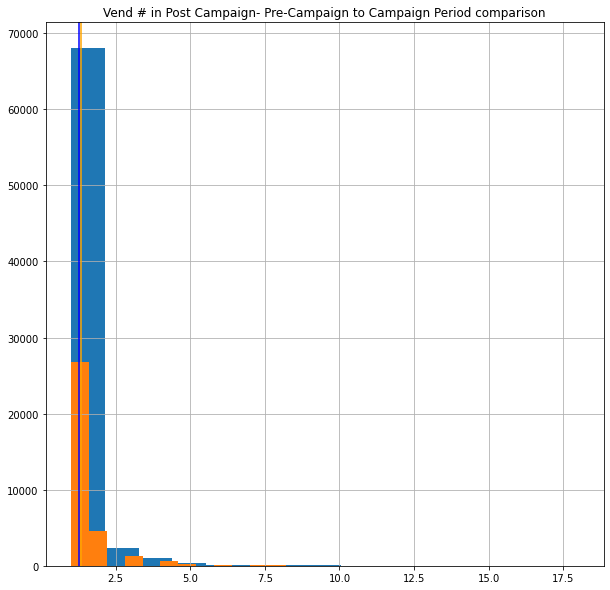

In [82]:
plt.figure(figsize=(10, 10))
df1.loc[(df1.first_vend_period=='campaign')&(df1.txn_period=='post campaign')&(df1.txn_num_daily <=20), 'txn_num_daily'].hist(bins=15)
df1.loc[(df1.first_vend_period=='pre campaign')&(df1.txn_period=='post campaign')&(df1.txn_num_daily <=10), 'txn_num_daily'].hist(bins=15)
plt.axvline(df1.loc[(df1.first_vend_period=='campaign')&(df1.txn_period=='post campaign')&(df1.txn_num_daily <=20), 'txn_num_daily'].mean(), color='blue', linestyle='solid', linewidth=1.5)
plt.axvline(df1.loc[(df1.first_vend_period=='pre campaign')&(df1.txn_period=='post campaign')&(df1.txn_num_daily <=10), 'txn_num_daily'].mean(), color='orange', linestyle='solid', linewidth=1.5)
plt.title('Vend # in Post Campaign- Pre-Campaign to Campaign Period comparison')
plt.show()

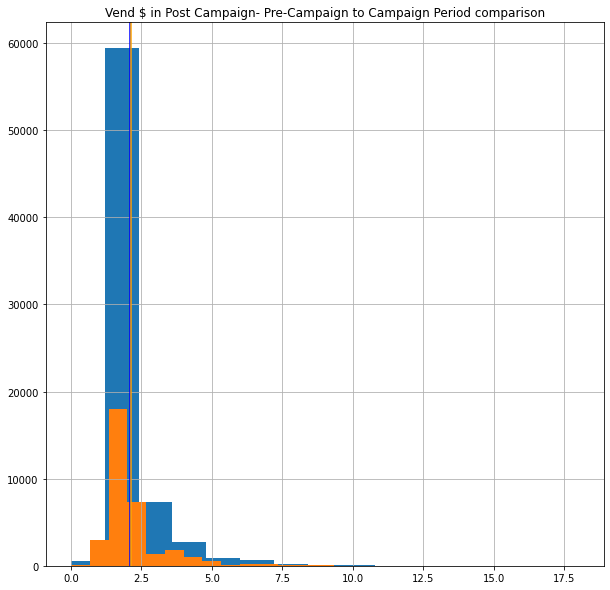

In [84]:
plt.figure(figsize=(10, 10))
df1.loc[(df1.first_vend_period=='campaign')&(df1.txn_period=='post campaign')&(df1.amount <=20), 'amount'].hist(bins=15)
df1.loc[(df1.first_vend_period=='pre campaign')&(df1.txn_period=='post campaign')&(df1.amount <=10), 'amount'].hist(bins=15)
plt.axvline(df1.loc[(df1.first_vend_period=='campaign')&(df1.txn_period=='post campaign')&(df1.amount <=20), 'amount'].mean(), color='blue', linestyle='solid', linewidth=1.5)
plt.axvline(df1.loc[(df1.first_vend_period=='pre campaign')&(df1.txn_period=='post campaign')&(df1.amount <=10), 'amount'].mean(), color='orange', linestyle='solid', linewidth=1.5)
plt.title('Vend $ in Post Campaign- Pre-Campaign to Campaign Period comparison')
plt.show()

In [ ]:
# df7.groupby(['YearMonth','payment_type', 'flag']).agg(met_dict).unstack().loc[months]

In [ ]:
# pd.Series(common).to_csv('common.csv')

In [56]:
met_dict= {'amount': lambda x: sum(x), 'txn_num_daily': 'sum', 'usr_id': 'nunique', 'machine_id': 'nunique'}

In [57]:
df1.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'payment_type', 'usr_id', 'amount', 'txn_num_daily', 'flag',
       'YearMonth', 'broad_pay_type', 'campaign_month', 'txn_period',
       'first_vend', 'last_vend', 'first_vend_period', 'last_vend_period'],
      dtype='object')

In [58]:
df5= df1.loc[(df1.campaign_month== 'campaign') & (df1.first_vend_period== 'campaign')].groupby(['as400id','flag']).agg(met_dict).reset_index()

In [59]:
df5.columns=['as400id', 'flag', 'amount', 'vend_count', 'user_cnt', 'machine_count']

In [60]:
cf1['as400id']= cf1.as400id.astype(int)

In [61]:
df6= df5.merge(cf1, how='left', on='as400id').fillna(0)

In [62]:
df6.columns

Index(['as400id', 'flag', 'amount', 'vend_count', 'user_cnt', 'machine_count',
       'Number of Units Mailed 1', 'SecondMail', 'FirstMail', 'GeoFenceFlag',
       'fflag', 'ClicksOnly', 'ImpressionOnly'],
      dtype='object')

In [63]:
X= df6.loc[:,['Number of Units Mailed 1','ClicksOnly', 'ImpressionOnly']].values

In [64]:
y=df6.loc[:,'amount' ].values

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
lin_reg_mod = linear_model.LinearRegression()
lin_reg_mod.fit(X_train, y_train)
y_hat = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_hat)))
test_set_r2 = r2_score(y_test, y_hat)
from sklearn.metrics import explained_variance_score
print('Root Mean Squared Error:', test_set_rmse, 'R Square:', test_set_r2, 'Explained Variance: ',explained_variance_score(y_test, y_hat))

Root Mean Squared Error: 1188.4864220367474 R Square: 0.026573593892800562 Explained Variance:  0.028718135223711028


## LAM/ AS400 Data

In [ ]:
df12= df12.loc[df12.payment_type=='App']

In [ ]:
df12.usr_id.nunique()

12153

In [ ]:
df12.amount.sum()/ df12.usr_id.nunique()

17.74863490496174

In [ ]:
df12.machine_id.fillna('1.Missing').value_counts().index

Index(['806-HYS', '805-HYS', '558-HNY', '503-HWX', '903-HDT', '544-GTD',
       '824-GLC', '324-HMH', '502-HWX', '814-GLC',
       ...
       '342-BWC', '695-GTD', '487-HMH', '103-HMB', '357-HVB', '477-HMH',
       '982-GWZ', '394-BWP', '300-BWR', '404-BWR'],
      dtype='object', length=7552)

In [ ]:
df= pd.concat([df1,df2], axis=0)

In [ ]:
del(df1)
del(df2)

In [ ]:
df.flag.value_counts()

cpgn    3636383
cntl    2723716
Name: flag, dtype: int64

In [ ]:
df.memory_usage().sum()*1e-6

610.5695039999999

In [ ]:
df.head()

,datetime,machine_id,machine_type,room_id,as400id,property_class,payment_type,usr_id,amount,txn_num_daily,flag
0,NaN,NaN,NaN,DI-5109475-6,5109475,Class C,Coin,99999999,0.0,1,cpgn
1,NaN,017-HWW,Washer,DI-18041-13,18041,Class B,Coin,99999999,0.0,1,cpgn
2,NaN,043-HYL,Washer,DI-5108532-1,5108532,Class C,Coin,99999999,0.0,1,cpgn
3,NaN,125-HTZ,Dryer,DI-5108645-12,5108645,Class C,Coin,99999999,0.0,1,cpgn
4,NaN,131-HVB,Washer,DI-19732-2,19732,Class C,Coin,99999999,0.0,1,cpgn


In [ ]:

len(df.loc[(df.payment_type=='App') & (df.usr_id.isin(['99999999']))])

0

In [ ]:
df.property_class.fillna('unknown', inplace= True)

In [ ]:
print(df.shape)
df.dropna(axis=0, inplace=True)
print(df.shape)

(6360099, 11)
(6038470, 11)


In [ ]:
df= df.loc[df.property_class!= 'Class A']

In [ ]:
test= pd.crosstab(df.property_class, df.flag, df.as400id, aggfunc='nunique').fillna(0)

In [ ]:
from pandas.plotting import table
def save_df(df, file):
  fig, ax = plt.subplots(figsize=(5, 4)) 
# no axes
  ax.xaxis.set_visible(False)  
  ax.yaxis.set_visible(False)  
# no frame
  ax.set_frame_on(False)  
# plot table
  tab = table(ax, df, loc='upper right')  
# set font manually
  tab.auto_set_font_size(False)
  tab.set_fontsize(11) 
# save the result
  plt.savefig('test.png')

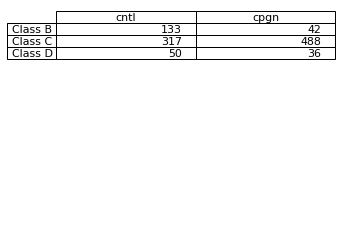

In [ ]:
save_df(test, 'test.png')

In [ ]:
df['datetime']= pd.to_datetime(df.datetime)
df['as400id']=df.as400id.astype('str')

In [ ]:
df.shape

(5918843, 11)

In [ ]:
df= df.loc[df.datetime <= pd.datetime.now()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'flag'],
      dtype='object')

In [ ]:
len(set(df.loc[df.flag=='cntl', 'usr_id']).intersection(df.loc[df.flag=='cpgn', 'usr_id']))

9174

In [ ]:
df.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'flag'],
      dtype='object')

In [ ]:
common=df.loc[df.datetime.between('2020-04-10', '2020-12-09')].groupby(['usr_id'])['flag'].agg('nunique')[df.loc[df.datetime.between('2020-04-10', '2020-12-09')].groupby(['usr_id'])['flag'].agg('nunique')> 1].index.tolist()

# Monthly ARPAU validation

In [ ]:
df.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'flag'],
      dtype='object')

In [ ]:
df['YearMonth'] = pd.to_datetime(df['datetime']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

In [ ]:
met_dict= {'amount': lambda x: sum(x), 'txn_num_daily': 'sum', 'usr_id': 'nunique', 'machine_id': 'nunique'}

In [ ]:
df7=df.loc[(df.payment_type!= 'Coin') & (df.datetime.between('04-01-2020', '12-01-2020'))]

In [ ]:
df7.YearMonth.unique().tolist()

['2020-4',
 '2020-5',
 '2020-6',
 '2020-7',
 '2020-8',
 '2020-9',
 '2020-10',
 '2020-11',
 '2020-12']

# High Level Stat

In [ ]:
df.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'flag', 'txn_period', 'broad_pay_type'],
      dtype='object')

In [ ]:
met_dict= {'amount': lambda x: sum(x)/100.00, 'txn_num_daily': 'sum', 'usr_id': 'nunique', 'machine_id': 'nunique'}

In [ ]:
len(df.loc[df.datetime > '2021-03-31'])

283307

In [ ]:
op1= df.loc[df.datetime.between('2020-04-10', '2020-12-09')].groupby(['flag', 'payment_type']).agg(met_dict).reset_index().pivot('payment_type', 'flag')

In [ ]:
op1

amount             txn_num_daily  ... usr_id machine_id      
flag                cntl        cpgn          cntl  ...   cpgn       cntl  cpgn
payment_type                                        ...                        
App            9075.3823  16847.4237        563477  ...  29675       6151  7597
Coin           5480.6849  10147.9250        380763  ...      1       3015  4376
CreditCard-SR  9173.9363   4178.6432        543249  ...   7365       4251  2239
LaundryCard    2186.1165   4324.6210        143244  ...   7114        956  2410

[4 rows x 8 columns]

In [ ]:
df.loc[df.datetime.between('2020-04-10', '2020-12-09')].groupby('flag')['datetime'].agg(['min', 'max'])

,min,max
flag,,
cntl,2020-04-10,2020-12-09
cpgn,2020-04-10,2020-12-09


# Vend Amount #

## Vend amount $ by broad payment type

In [ ]:
# amt1= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['amount'].agg('sum').reset_index()
# amt1= amt1.pivot('txn_period', 'broad_pay_type', 'amount')
# amt1= 100*amt1.div(amt1.sum(axis=1), axis=0)

# amt1.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Vend Periods', ylabel='Vend % ($)', colormap="Accent")
# plt.axhline(45, color='blue')
# plt.show()

In [ ]:
# amt1= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['amount'].agg('sum').reset_index()
# amt1= amt1.pivot('txn_period', 'broad_pay_type', 'amount')
# # amt1= 100*amt1.div(amt1.sum(axis=1), axis=0)

# amt1.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Vend Periods', ylabel='Vend ($)', colormap="Accent")
# plt.axhline(390000, color='blue')
# plt.show()

# Daily Vend Number

## Daily Vend Number by Payment Type

In [ ]:
# amt1= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['txn_num_daily'].agg('sum').reset_index()
# amt1= amt1.pivot('txn_period', 'broad_pay_type', 'txn_num_daily')
# amt1= 100*amt1.div(amt1.sum(axis=1), axis=0)
# amt1.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Periods', ylabel='Vend % (#)', colormap="Accent")
# plt.axhline(43, color='blue')
# plt.show()

In [ ]:
# amt1= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['txn_num_daily'].agg('sum').reset_index()
# amt1= amt1.pivot('txn_period', 'broad_pay_type', 'txn_num_daily')
# # amt1= 100*amt1.div(amt1.sum(axis=1), axis=0)
# amt1.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Periods', ylabel='Vend (#)', colormap="Accent")
# plt.axhline(240000, color='blue')
# plt.show()

In [ ]:
# amt7= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['txn_num_daily'].agg('sum').reset_index()
# amt7= amt7.pivot('txn_period', 'broad_pay_type', 'txn_num_daily')
# # amt7= 100*amt1.div(amt1.sum(axis=1), axis=0)
# amt7.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Periods', ylabel='Vend % ($)', colormap="Accent")
# plt.axhline(43, color='blue')
# plt.show()

# Only App

In [ ]:
order_lst_4

['pre campaign', 'campaign', '2nd mailer', 'post campaign']

In [ ]:
df1= df.loc[df.payment_type=='App']

In [ ]:
df1.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'flag', 'txn_period', 'broad_pay_type'],
      dtype='object')

In [ ]:
df1.isnull().sum()

datetime          0
machine_id        0
machine_type      0
room_id           0
as400id           0
property_class    0
payment_type      0
usr_id            0
amount            0
txn_num_daily     0
flag              0
txn_period        0
broad_pay_type    0
dtype: int64

## By Property Type

In [ ]:
df.loc[df.datetime.between('2020-04-10', '2020-12-09')].groupby(['flag', 'property_class']).agg(met_dict).reset_index().pivot('property_class', 'flag')

amount             txn_num_daily  ... usr_id machine_id      
flag                  cntl        cpgn          cntl  ...   cpgn       cntl  cpgn
property_class                                        ...                        
Class B          7874.9432   6042.7909        474856  ...   9035       1919  1259
Class C         14857.8671  24820.1775        942793  ...  30329       3508  5596
Class D          3183.3097   4635.6445        213084  ...   7397        820   987

[3 rows x 8 columns]

# Last Vend & First Vend

In [ ]:
# df1.loc[:,'period']= None
# df1.loc[df1.datetime.between('2020-04-10', '2020-06-09'), 'period']= 'pre campaign'
# df1.loc[df1.datetime.between('2020-06-10', '2020-08-09'), 'period']= 'campaign'
# df1.loc[df1.datetime.between('2020-08-10', '2020-10-09'), 'period']= '2nd mailer'
# df1.loc[df1.datetime.between('2020-10-10', '2020-12-09'), 'period']= 'post campaign'

In [ ]:
len(df1.usr_id.unique())

99829

In [ ]:
df1['first_vend_period']= None
df1.loc[df1.first_vend.between('1900-04-10', '2020-04-09'), 'first_vend_period']= 'before'
df1.loc[df1.first_vend.between('2020-04-10', '2020-06-09'), 'first_vend_period']= 'pre campaign'
df1.loc[df1.first_vend.between('2020-06-10', '2020-08-09'), 'first_vend_period']= 'campaign'
df1.loc[df1.first_vend.between('2020-08-10', '2020-10-09'), 'first_vend_period']= '2nd mailer'
df1.loc[df1.first_vend.between('2020-10-10', '2020-12-09'), 'first_vend_period']= 'post campaign'
df1.loc[df1.first_vend.between('2020-12-10', '2021-08-09'), 'first_vend_period']= 'after'

In [ ]:
# df1.loc[df1.loc[:,'first_vend'].between('1900-04-10', '2020-04-09'),'first_vend_period']= 'before'

In [ ]:
df1['last_vend_period']= None
df1.loc[df1.last_vend.between('1900-04-10', '2020-04-09'), 'last_vend_period']= 'before'
df1.loc[df1.last_vend.between('2020-04-10', '2020-06-09'), 'last_vend_period']= 'pre campaign'
df1.loc[df1.last_vend.between('2020-06-10', '2020-08-09'), 'last_vend_period']= 'campaign'
df1.loc[df1.last_vend.between('2020-08-10', '2020-10-09'), 'last_vend_period']= '2nd mailer'
df1.loc[df1.last_vend.between('2020-10-10', '2020-12-09'), 'last_vend_period']= 'post campaign'
df1.loc[df1.last_vend.between('2020-12-10', '2021-08-09'), 'last_vend_period']= 'after'

In [ ]:
leading_date= {'pre campaign': '2020-04-10', 'campaign': '2020-06-10', '2nd mailer': '2020-08-10', 'post campaign': '2020-10-10'}

In [ ]:
# pd.crosstab([df1.flag,df1.first_vend_period], df1.last_vend_period, df1.usr_id, aggfunc='nunique').loc[order_lst_6, order_lst_4].fillna(0)

In [ ]:
met_dict2 ={'amount': lambda x: sum(x)/100.00, 'usr_id': 'nunique'}

In [ ]:
df1.groupby(['txn_period', 'first_vend_period', 'flag']).agg(met_dict2).loc[order_lst_6, order_lst_6, ['cpgn', 'cntl']].unstack()

amount             usr_id       
flag                                  cntl        cpgn   cntl   cpgn
txn_period    first_vend_period                                     
2nd mailer    2nd mailer         1025.3925    785.3197   6250   5192
              before              514.4480   2314.3606   1718   6840
              campaign           1005.9461    752.8236   3199   2481
              pre campaign        351.9215    523.3908   1144   1609
after         2nd mailer         1535.8985   1194.5761   3025   2396
              after              1817.7830   2011.8892   8282   8533
              before              727.5925   3719.4204   1386   5772
              campaign           1218.0277    945.2491   2196   1691
              post campaign       999.0142   1040.3172   2095   2060
              pre campaign        404.6604    693.1653    783   1121
before        before             2112.8168  10957.7100   8594  37533
campaign      before              666.2924   2726.3996   2178   8283
              campaign            760.8125    679.2027   5147   4862
              pre campaign        463.0153    686.4225   1560   2184
post campaign 2nd mailer         1054.0718    819.8250   3557   2768
              before              426.9290   2066.4535   1379   5962
              campaign            831.0425    625.6494   2495   1916
              post campaign       542.6475    548.3346   4160   4007
              pre campaign        268.0409    413.7441    901   1327
pre campaign  before              752.3859   3269.6973   2596   9588
              pre campaign        412.4364    635.8003   2779   4497

In [ ]:
order_lst_3= ['campaign', '2nd mailer', 'post campaign']

In [ ]:
fly_o= df1.groupby(['last_vend_period','first_vend_period','flag']).agg(met_dict2).unstack('flag').reset_index()

In [ ]:
# fly_o.first_vend_period= fly_o.first_vend_period.astype('category')
# fly_o.last_vend_period= fly_o.last_vend_period.astype('category')

In [ ]:
# fly_o.first_vend_period.cat.reorder_categories(order_lst_6, inplace=True)
# fly_o.last_vend_period.cat.reorder_categories(order_lst_6, inplace=True)

In [ ]:
map_dict= dict(zip(order_lst_6, [1,2,3,4,5,6]))

In [ ]:
fly_o['fi']= fly_o.first_vend_period.map(map_dict)
fly_o['li']= fly_o.last_vend_period.map(map_dict)

In [ ]:
fly_o.sort_values(['li','fi'])

last_vend_period first_vend_period     amount  ... usr_id fi li
flag                                          cntl  ...   cpgn      
10             before            before   779.3450  ...  26153  1  1
19       pre campaign            before   283.7488  ...   1780  1  2
20       pre campaign      pre campaign    85.4066  ...   2092  2  2
11           campaign            before   464.5096  ...   1716  1  3
13           campaign      pre campaign   143.9630  ...    572  2  3
12           campaign          campaign   128.9792  ...   2120  3  3
1          2nd mailer            before   397.2488  ...   1137  1  4
3          2nd mailer      pre campaign   164.1016  ...    340  2  4
2          2nd mailer          campaign   231.8981  ...    614  3  4
0          2nd mailer        2nd mailer   179.8457  ...   2178  4  4
15      post campaign            before   339.7930  ...    969  1  5
18      post campaign      pre campaign   216.7960  ...    372  2  5
16      post campaign          campaign   347.2347  ...    437  3  5
14      post campaign        2nd mailer   301.2913  ...    620  4  5
17      post campaign     post campaign   162.5646  ...   1947  5  5
6               after            before  2935.8194  ...   5778  1  6
9               after      pre campaign  1289.8073  ...   1121  2  6
7               after          campaign  3107.7168  ...   1691  3  6
4               after        2nd mailer  3134.2258  ...   2396  4  6
8               after     post campaign  1379.0971  ...   2060  5  6
5               after             after  1817.7830  ...   8533  6  6

[21 rows x 8 columns]

In [ ]:
idx=[]
for i in range(len(order_lst_6)):
  for j in range(len(order_lst_6)):
    if i<= j:
      idx.append((order_lst_6[i], order_lst_6[j]))
idx= tuple(idx)

In [ ]:
len(idx)

21

## Daily Vend #  in txn_period by first vend period 

In [ ]:
# txn1= df1.groupby(['first_vend_period', 'txn_period'])['txn_num_daily'].agg('sum').reset_index().\
# pivot('first_vend_period', 'txn_period', 'txn_num_daily').loc[order_lst_6, order_lst_6].fillna(0)

In [ ]:
# txn1

In [ ]:
# txn1= txn1/10000

In [ ]:
# fig, ax = plt.subplots(figsize=(12,10))  
# sns.heatmap(txn1.loc[order_lst_6, order_lst_4], center=7.0,annot=True, ax=ax, cmap='Spectral')

## Vend $ in txn_period by first vend period

In [ ]:
# amt2= df1.groupby(['first_vend_period', 'txn_period'])['amount'].agg('sum').reset_index().\
# pivot('first_vend_period', 'txn_period', 'amount').fillna(0)

In [ ]:
# amt2

In [ ]:
# amt2= amt2/10000

In [ ]:
# amt2

In [ ]:
# fig, ax = plt.subplots(figsize=(12,10))  
# sns.heatmap(amt2.loc[order_lst_6, order_lst_4], center=7.0,annot=True, ax=ax, cmap='Spectral')

## Unique Users in txn_period by first vend period

In [ ]:
# usr3= df1.groupby(['first_vend_period', 'txn_period'])['usr_id'].agg('nunique').reset_index().\
# pivot('first_vend_period', 'txn_period', 'usr_id').loc[order_lst_6, order_lst_6].fillna(0)

In [ ]:
# usr3

In [ ]:
# usr3= df1.groupby(['first_vend_period', 'txn_period'])['usr_id'].agg('nunique').reset_index().\
# pivot('first_vend_period', 'txn_period', 'usr_id').fillna(0)
# usr3= usr3/100
# fig, ax = plt.subplots(figsize=(12,10))  
# sns.heatmap(usr3.loc[order_lst_6, order_lst_4], center=7.0,annot=True, ax=ax, cmap='Spectral')

## Flythrough Analysis/ Drop Off Analysis- #, $

In [ ]:

# usr3= 100*usr3.loc[order_lst_6, order_lst_6]


In [ ]:
# usr3.iloc[:,1:].cumsum(axis=1).iloc[:,-1]

In [ ]:
# cumslc=[]
# for i in range(usr3.shape[1]):
#   ser=usr3.iloc[:,i:].cumsum(axis=1).iloc[:,-1]
#   cumslc.append(ser)
# # cumslc.append(usr3.iloc[:,-1])

In [ ]:
# usr4= pd.concat(cumslc, axis=1)

In [ ]:
# usr4.columns=order_lst_6

In [ ]:
# for i in range(usr4.shape[0]):
#   for j in range(usr4.shape[1]):
#     if j<i:
#       usr4.iloc[i,j]=0

In [ ]:
# usr4

In [ ]:
# usr4.divide(usr4.max(axis=1), axis=0)

,before,pre campaign,campaign,2nd mailer,post campaign,after
first_vend_period,,,,,,
before,1.0,0.492646,0.363040,0.251075,0.158615,0.078023
pre campaign,0.0,1.000000,0.581207,0.377817,0.227975,0.104396
campaign,0.0,0.000000,1.000000,0.555982,0.329406,0.154429
2nd mailer,0.0,0.000000,0.000000,1.000000,0.498503,0.231237
post campaign,0.0,0.000000,0.000000,0.000000,1.000000,0.339595
after,0.0,0.000000,0.000000,0.000000,0.000000,1.000000


# Incremental ARPAU

In [ ]:
arpu_1= pd.crosstab( df1.first_vend_period,[df1.txn_period, df1.flag], df1.amount, aggfunc='sum').loc[order_lst_6, order_lst_6].fillna(0)

In [ ]:
arpu_1

txn_period            before             ...      after           
flag                    cntl       cpgn  ...       cntl       cpgn
first_vend_period                        ...                      
before             211281.68  1095771.0  ...   72759.25  371942.04
pre campaign            0.00        0.0  ...   40466.04   69316.53
campaign                0.00        0.0  ...  121802.77   94524.91
2nd mailer              0.00        0.0  ...  153589.85  119457.61
post campaign           0.00        0.0  ...   99901.42  104031.72
after                   0.00        0.0  ...  181778.30  201188.92

[6 rows x 12 columns]

In [ ]:
arpu_2=pd.crosstab(df1.first_vend_period,[df1.txn_period, df1.flag], df1.usr_id, aggfunc='nunique').loc[order_lst_6, order_lst_6].fillna(1)

In [ ]:
# arpu_3=pd.crosstab(df1.first_vend_period, df1.txn_period, df1.txn_num_daily, aggfunc='sum').loc[order_lst_6, order_lst_6].fillna(0)

In [ ]:
arpu_2

txn_period         before          pre campaign  ... post campaign   after        
flag                 cntl     cpgn         cntl  ...          cpgn    cntl    cpgn
first_vend_period                                ...                              
before             8594.0  37533.0       2596.0  ...        5962.0  1386.0  5772.0
pre campaign          1.0      1.0       2779.0  ...        1327.0   783.0  1121.0
campaign              1.0      1.0          1.0  ...        1916.0  2196.0  1691.0
2nd mailer            1.0      1.0          1.0  ...        2768.0  3025.0  2396.0
post campaign         1.0      1.0          1.0  ...        4007.0  2095.0  2060.0
after                 1.0      1.0          1.0  ...           1.0  8282.0  8533.0

[6 rows x 12 columns]

In [ ]:
arpu_1.divide(arpu_2, axis=1).loc[order_lst_6, order_lst_4]

txn_period        pre campaign             ... post campaign           
flag                      cntl       cpgn  ...          cntl       cpgn
first_vend_period                          ...                         
before               28.982508  34.101974  ...     30.959318  34.660408
pre campaign         14.841180  14.138321  ...     29.749267  31.178907
campaign              0.000000   0.000000  ...     33.308317  32.653935
2nd mailer            0.000000   0.000000  ...     29.633731  29.617955
post campaign         0.000000   0.000000  ...     13.044411  13.684417
after                 0.000000   0.000000  ...      0.000000   0.000000

[6 rows x 8 columns]

In [ ]:
arpu_3.divide(arpu_2, axis=1).loc[order_lst_6, order_lst_4]

txn_period,pre campaign,campaign,2nd mailer,post campaign
first_vend_period,,,,
before,21.014497,20.319691,20.939181,21.467628
pre campaign,8.657327,19.209707,19.875699,19.020347
campaign,0.000000,8.550802,18.393793,19.757829
2nd mailer,0.000000,0.000000,9.072419,17.810264
post campaign,0.000000,0.000000,0.000000,8.377745
after,0.000000,0.000000,0.000000,0.000000


# Back of the Envelope Model

In [ ]:
campaign.head(1).T

,0
Apartment Name,100 CENTER APARTMENTS
Street,101 OLD STABLE LN APT A1
City,MISHAWAKA
State,IN
ZIP,46544
Latitude,41.6614
Longitude,86.1901
AS400,5108462
Number of Units Mailed 1,54
SecondMail,N


In [ ]:
len(common)

7168

In [ ]:
df1=df.loc[df.payment_type== 'App']
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.flag.value_counts()

cntl    27494
cpgn    25369
Name: flag, dtype: int64

In [ ]:
df1=df1.loc[~df1.usr_id.isin(list(common))]

In [ ]:
vend_range= df1.groupby('usr_id')['datetime'].agg(['min', 'max']).reset_index().rename(columns={'usr_id': 'usr_id','min':'first_vend', 'max':'last_vend'})
df1= df1.merge(vend_range, on='usr_id', how='left')

In [ ]:
df1['first_vend_period']= None
df1.loc[df1.first_vend.between('1900-04-10', '2020-04-09'), 'first_vend_period']= 'before'
df1.loc[df1.first_vend.between('2020-04-10', '2020-06-09'), 'first_vend_period']= 'pre campaign'
df1.loc[df1.first_vend.between('2020-06-10', '2020-08-09'), 'first_vend_period']= 'campaign'
df1.loc[df1.first_vend.between('2020-08-10', '2020-10-09'), 'first_vend_period']= '2nd mailer'
df1.loc[df1.first_vend.between('2020-10-10', '2020-12-09'), 'first_vend_period']= 'post campaign'
df1.loc[df1.first_vend.between('2020-12-10', '2021-08-09'), 'first_vend_period']= 'after'

df1['last_vend_period']= None
df1.loc[df1.last_vend.between('1900-04-10', '2020-04-09'), 'last_vend_period']= 'before'
df1.loc[df1.last_vend.between('2020-04-10', '2020-06-09'), 'last_vend_period']= 'pre campaign'
df1.loc[df1.last_vend.between('2020-06-10', '2020-08-09'), 'last_vend_period']= 'campaign'
df1.loc[df1.last_vend.between('2020-08-10', '2020-10-09'), 'last_vend_period']= '2nd mailer'
df1.loc[df1.last_vend.between('2020-10-10', '2020-12-09'), 'last_vend_period']= 'post campaign'
df1.loc[df1.last_vend.between('2020-12-10', '2021-08-09'), 'last_vend_period']= 'after'

In [ ]:
df1=df1.loc[(df1.first_vend_period.isin(['campaign', '2nd mailer'])) & (df1.last_vend_period.isin(['campaign', '2nd mailer']))]

In [ ]:
df11= df1.groupby(['flag','as400id'])['txn_num_daily'].sum().reset_index()

In [ ]:
df2= df11.merge(campaign, how='left', left_on='as400id', right_on='AS400')

In [ ]:
df2['flag']= df2.flag.map({'cpgn':1, 'cntl':0})

In [ ]:
df2['FirstMail']=df2.FirstMail.fillna('N').map({'Y':1, 'N':0})

In [ ]:
df2['SecondMail']= df2.SecondMail.fillna('N').map({'Y':1, 'N':0})

In [ ]:
df2.columns

Index(['flag', 'as400id', 'txn_num_daily', 'Apartment Name', 'Street', 'City',
       'State', 'ZIP', 'Latitude', 'Longitude', 'AS400',
       'Number of Units Mailed 1', 'SecondMail', 'FirstMail',
       'Geography Geo Fence Name', 'Performance Impressions',
       'Performance Clicks', 'Performance CTR', 'Performance eCPM',
       'Performance Total Spend'],
      dtype='object')

In [ ]:
df3= df2.loc[:, ['as400id', 'txn_num_daily', 'flag', 'FirstMail','SecondMail', 'Performance Impressions','Performance Clicks']].fillna(0)

In [ ]:
# df3= df2.loc[((df2.last_vend_period.isin(['post campaign', 'after'])) & (df2.first_vend_period.isin(['campaign', '2nd mailer'])))]

In [ ]:
df3.columns

Index(['as400id', 'txn_num_daily', 'flag', 'FirstMail', 'SecondMail',
       'Performance Impressions', 'Performance Clicks'],
      dtype='object')

In [ ]:
# df4= df3.groupby(['as400id', 'flag', 'FirstMail','SecondMail'])['txn_num_daily','Performance Impressions','Performance Clicks'].agg('sum').reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# df2.columns

In [ ]:
# df4= pd.get_dummies(df4, columns=['property_class'])

In [ ]:
# df4['SecondMail']=df4.SecondMail.map({'Y':1, 'N':0})

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X=df3.loc[:, ['flag', 'SecondMail','Performance Impressions', 'Performance Clicks']]
y= df3.txn_num_daily

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
lin_reg_mod = linear_model.LinearRegression()
lin_reg_mod.fit(X_train, y_train)
y_hat = lin_reg_mod.predict(X_test)

In [ ]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_hat)))
test_set_r2 = r2_score(y_test, y_hat)

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_hat)

0.08887751516809683

In [ ]:
print('Root Mean Squared Error:', test_set_rmse, 'R Square:', test_set_r2)

Root Mean Squared Error: 83.55950400662918 R Square: 0.07147939867054043


In [ ]:
plt.bar(attr, coeff)
plt.xlabel("Coefficients") 
  
# setting y_label as price
plt.ylabel("Value")   
plt.title("Weighst of Regression Coefficients")
plt.show()

NameError: ignored

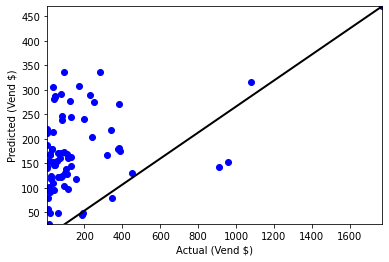

In [ ]:
plt.scatter(y_test, y_hat,  color='blue')
plt.plot([0, max(y_test)], [0, max(y_hat)], color = 'black', linewidth = 2)
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_hat), max(y_hat))
plt.xlabel('Actual (Vend $)')
plt.ylabel('Predicted (Vend $)')
plt.show()

In [ ]:
df4.columns

Index(['as400id', 'SecondMail', 'Performance Impressions',
       'Performance Clicks', 'amount', 'property_class_Class B',
       'property_class_Class C', 'property_class_Class D'],
      dtype='object')

In [ ]:
attr= ['SecondMail', 'Performance Impressions','Performance Clicks']

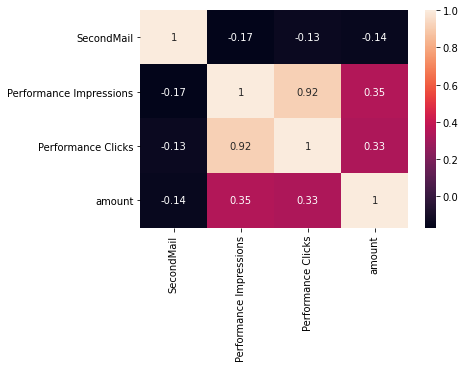

In [ ]:
sns.heatmap(df4.loc[:, df4.columns.isin(['SecondMail', 'Performance Impressions','Performance Clicks', 'amount'])].\
            corr(), annot= True)

In [ ]:
coeff= [-86.57427454, 354.22485053,  30.12679793]

In [ ]:
dict(zip(attr,coeff))

{'Performance Clicks': 30.12679793,
 'Performance Impressions': 354.22485053,
 'SecondMail': -86.57427454}

## Other Stuff

In [ ]:
df1.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'txn_period', 'broad_pay_type', 'first_vend', 'last_vend',
       'first_vend_period', 'last_vend_period'],
      dtype='object')

In [ ]:
df5= df1.loc[df1.usr_id!='99999']

In [ ]:
df5=df5.loc[~df5.txn_period.isin(['before', 'after'])]

In [ ]:
dfs=[df5.groupby(['usr_id', 'txn_period'])['amount'].sum(),
df5.groupby(['usr_id', 'txn_period'])['txn_num_daily'].sum()]

In [ ]:
pd.concat(dfs, axis=1).reset_index()

,usr_id,txn_period,amount,txn_num_daily
0,100017,campaign,5.00,3
1,100095,2nd mailer,54.45,32
2,100095,campaign,38.55,23
3,100095,post campaign,43.60,26
4,100095,pre campaign,47.55,28
...,...,...,...,...
61507,99911,pre campaign,4.50,3
61508,99949,2nd mailer,1.75,1
61509,99952,2nd mailer,21.25,12
61510,99952,campaign,9.50,6


In [ ]:
p5=df5.amount.describe(percentiles=[.05,.25,.50,.75,.95]).loc['5%']
p95= df5.amount.describe(percentiles=[.05,.25,.50,.75,.95]).loc['95%']
df5["amount"] = np.where(df5["amount"] <p5, p5,df5['amount'])
df5["amount"] = np.where(df5["amount"] >p95, p95,df5['amount'])

In [ ]:
p5=df5.txn_num_daily.describe(percentiles=[.05,.25,.50,.75,.95]).loc['5%']
p95= df5.txn_num_daily.describe(percentiles=[.05,.25,.50,.75,.95]).loc['95%']
df5["txn_num_daily"] = np.where(df5["txn_num_daily"] <p5, p5,df5['txn_num_daily'])
df5["txn_num_daily"] = np.where(df5["txn_num_daily"] >p95, p95,df5['txn_num_daily'])

In [ ]:
df5.txn_num_daily.describe()

count    757242.000000
mean          1.297181
std           0.600816
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: txn_num_daily, dtype: float64

In [ ]:
df5['amt_bkt']= pd.qcut(df5.amount,5, labels=[1,2,3,4,5])
df5['txn_num_bkt']= np.where(df5["txn_num_daily"] > 1, 2 ,1)

In [ ]:
df5['mf_bkt']= df5.txn_num_bkt*10
df5['mf_bkt']= df5['mf_bkt']+df5['txn_num_bkt']

In [ ]:
df5.mf_bkt.value_counts()

11    589798
22    167444
Name: mf_bkt, dtype: int64